<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Sound_Classification_using_Deep_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
Apply Deep Learning techniques to the classification of environmental sounds, specifically focusing on the identification of particular urban sounds.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Fastai/Udacity-ML-Capstone-master.zip'

Archive:  /content/drive/My Drive/Fastai/Udacity-ML-Capstone-master.zip
d81b98991e5057b098f41873e8ed544e4626c75f
   creating: Udacity-ML-Capstone-master/
   creating: Udacity-ML-Capstone-master/Evaluation audio/
  inflating: Udacity-ML-Capstone-master/Evaluation audio/dog_bark_1.wav  
  inflating: Udacity-ML-Capstone-master/Evaluation audio/drilling_1.wav  
  inflating: Udacity-ML-Capstone-master/Evaluation audio/gun_shot_1.wav  
  inflating: Udacity-ML-Capstone-master/Evaluation audio/siren_1.wav  
   creating: Udacity-ML-Capstone-master/Notebooks/
  inflating: Udacity-ML-Capstone-master/Notebooks/1 Data Exploration and Visualisation.ipynb  
  inflating: Udacity-ML-Capstone-master/Notebooks/2 Data Preprocessing and Data Splitting.ipynb  
  inflating: Udacity-ML-Capstone-master/Notebooks/3 Model Training and Evaluation.ipynb  
  inflating: Udacity-ML-Capstone-master/Notebooks/4 Model Refinement.ipynb  
  inflating: Udacity-ML-Capstone-master/Notebooks/Appendix Helpers.ipynb  
   creati

# Dataset
For this we will use a dataset called Urbansound8K. The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, which are:

• Air Conditioner

• Car Horn

• Children Playing

• Dog bark

• Drilling

• Engine Idling

• Gun Shot

• Jackhammer

• Siren

• Street Music

Source : https://urbansounddataset.weebly.com/download-urbansound8k.html

https://github.com/mikesmales/Udacity-ML-Capstone/blob/master/Notebooks/2%20Data%20Preprocessing%20and%20Data%20Splitting.ipynb

https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7

https://towardsdatascience.com/sound-classification-using-images-68d4770df426#:~:text=Classifying%20audio%20files%20using%20images,audio%20tagging%20have%20various%20applications.

In [48]:
import pandas as pd
import os
import librosa
from fastai import *
from fastai.vision import *

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


After mounting on drive, use shutil.unpack_archive. It works with almost all archive formats (e.g., “zip”, “tar”, “gztar”, “bztar”, “xztar”) and it's simple:

In [ ]:
!sudo tar -xvf  "/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K.tar"  -C "/content/drive/My Drive/AV_Hack/Sound"


Streaming output truncated to the last 5000 lines.
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fold4/185909-2-0-34.wav
UrbanSound8K/aud

In [3]:
sound = pd.read_csv('/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/metadata/UrbanSound8K.csv')

In [4]:
sound.shape

(8732, 8)

In [4]:
sound.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
train = sound[['slice_file_name','class']].copy()

# Listen to one of the audio files in Jupyter

In [153]:
import IPython
IPython.display.Audio('/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/audio/fold1/101415-3-0-2.wav')

In [7]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

# Preprocessing stage
For much of the preprocessing we will be able to use Librosa's load() function.

We will compare the outputs from Librosa against the default outputs of scipy's wavfile library using a chosen file from the dataset.

In [8]:

import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = '/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/audio/fold1/101415-3-0-2.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 48000
Librosa sample rate: 22050


# Bit-depth
Librosa’s load function will also normalise the data so it's values range between -1 and 1. This removes the complication of the dataset having a wide range of bit-depths.

In [9]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -27967 to 26427
Librosa audio file min~max range: -0.8541817 to 0.8053372


# Merge audio channels
Librosa will also convert the signal to mono, meaning the number of channels will always be 1.

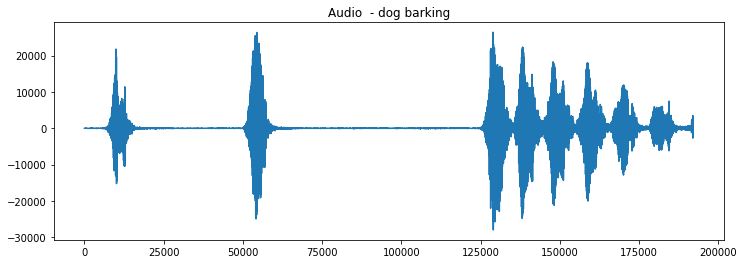

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.title('Audio  - dog barking')
plt.show()

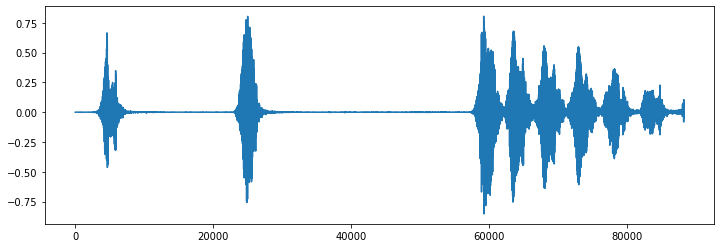

In [ ]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)
plt.show()

# Extract Features
As outlined in the proposal, we will extract Mel-Frequency Cepstral Coefficients (MFCC) from the the audio samples.

The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

#### Extracting a MFCC
For this we will use Librosa's mfcc() function which generates an MFCC from time series audio data.

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


This shows librosa calculated a series of 40 MFCCs over 173 frames.

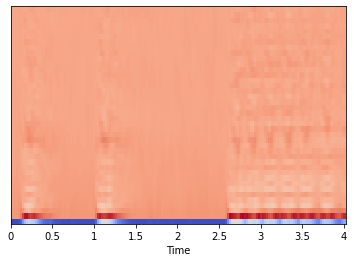

In [11]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

# Extracting MFCC's for every file

extract an MFCC for each audio file in the dataset and store it in a Panda Dataframe along with it's classification label.

In [ ]:
# Set the path to the full UrbanSound dataset 
import shutil
dest = '/content/drive/My Drive/AV_Hack/Sound/train/'
fulldatasetpath = '/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/audio'

features = []

# Iterate through each sound file and extract the features 
for index, row in sound.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    #data = extract_features(file_name)
    
    #features.append([data, class_label])
    shutil.copy(file_name,dest)

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [ ]:
featuresdf.to_csv('/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/train_sound/featuresdf.csv')

In [ ]:
featuresdf = pd.read_csv('/content/drive/My Drive/AV_Hack/Sound/UrbanSound8K/train_sound/featuresdf.csv')

In [ ]:
featuresdf.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
featuresdf.head()

,feature,class_label
0,[-2.157930e+02 7.166612e+01 -1.318138e+02 -5....,dog_bark
1,[-4.246869e+02 1.105623e+02 -5.414824e+01 6....,children_playing
2,[-4.595647e+02 1.228003e+02 -4.792471e+01 5....,children_playing
3,[-4.145538e+02 1.028969e+02 -3.666495e+01 5....,children_playing
4,[-4.473970e+02 1.150954e+02 -5.380911e+01 6....,children_playing


In [ ]:
from fastai import *
from fastai.vision import *

In [5]:
train = sound[['slice_file_name','class']].copy()
train.shape

(8732, 2)

In [6]:
train.head()

,slice_file_name,class
0,100032-3-0-0.wav,dog_bark
1,100263-2-0-117.wav,children_playing
2,100263-2-0-121.wav,children_playing
3,100263-2-0-126.wav,children_playing
4,100263-2-0-137.wav,children_playing


In [7]:
train['Image'] = train['slice_file_name'].apply(lambda x : x.replace(".wav",".png"))

In [8]:
train.head()

,slice_file_name,class,Image
0,100032-3-0-0.wav,dog_bark,100032-3-0-0.png
1,100263-2-0-117.wav,children_playing,100263-2-0-117.png
2,100263-2-0-121.wav,children_playing,100263-2-0-121.png
3,100263-2-0-126.wav,children_playing,100263-2-0-126.png
4,100263-2-0-137.wav,children_playing,100263-2-0-137.png


# Convert .wav files to .png

In [ ]:
src ='/content/drive/My Drive/AV_Hack/Sound/train/'
dest = '/content/drive/My Drive/AV_Hack/Sound/Spectrogram/'
for image in train['slice_file_name'].values.tolist():
  audio_file = src+image
  samples,sample_rate = librosa.load(audio_file,duration=5.0)
  fig = plt.figure(figsize=[0.72,0.72])
  ax =fig.add_subplot(111)
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  filename = dest+ image.replace('.wav','.png')
  S = librosa.feature.melspectrogram(y=samples,sr=sample_rate)
  librosa.display.specshow(librosa.power_to_db(S,ref=np.max))

  plt.savefig(filename,dpi=400,bbox_inches="tight",pad_inches=0)
  plt.close('all')
  
  




In [ ]:
train.head()

,slice_file_name,class,Image
0,100032-3-0-0.wav,dog_bark,100032-3-0-0.png
1,100263-2-0-117.wav,children_playing,100263-2-0-117.png
2,100263-2-0-121.wav,children_playing,100263-2-0-121.png
3,100263-2-0-126.wav,children_playing,100263-2-0-126.png
4,100263-2-0-137.wav,children_playing,100263-2-0-137.png


In [12]:
train_df = train[['Image','class']].copy()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


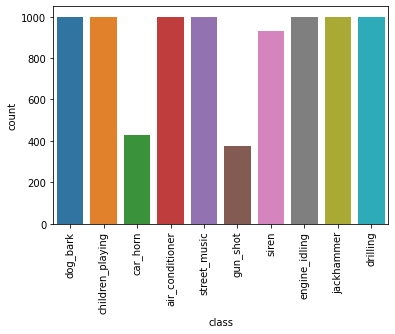

In [13]:
import seaborn as sns
sns.countplot(train_df['class'])
plt.xticks(rotation=90)
plt.show()

In [9]:
files = [x for x in os.listdir('/content/drive/My Drive/AV_Hack/Sound/Spectrogram/')]

In [10]:
len(files)

7654

In [14]:
train_df.head()

,Image,class
0,100032-3-0-0.png,dog_bark
1,100263-2-0-117.png,children_playing
2,100263-2-0-121.png,children_playing
3,100263-2-0-126.png,children_playing
4,100263-2-0-137.png,children_playing


In [16]:
Images = []
Label = []
for i in files:
  #print(i)
  Images.append(i)
  Label.append(train_df[train_df['Image'] ==i]['class'].values.tolist()[0])
  #break
  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

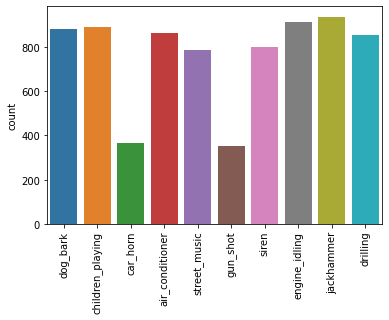

In [17]:
sns.countplot(Label)
plt.xticks(rotation=90)

In [18]:
sample_df = pd.DataFrame({'Image':Images,'Label':Label})
sample_df.head()

,Image,Label
0,100032-3-0-0.png,dog_bark
1,100263-2-0-117.png,children_playing
2,100263-2-0-121.png,children_playing
3,100263-2-0-126.png,children_playing
4,100263-2-0-137.png,children_playing


In [19]:
sample_df.shape

(7654, 2)

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
path = '/content/drive/My Drive/AV_Hack/Sound/Spectrogram'
data = ImageDataBunch.from_df(path=path, df=sample_df,
                              fn_col=0, 
                              label_col=1,
                              ds_tfms=get_transforms(),
                              valid_pct=0.2,bs=8,size=64).normalize(imagenet_stats)

In [83]:
data

ImageDataBunch;

Train: LabelList (6124 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
dog_bark,children_playing,children_playing,children_playing,children_playing
Path: /content/drive/My Drive/AV_Hack/Sound/Spectrogram;

Valid: LabelList (1530 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
siren,engine_idling,dog_bark,siren,street_music
Path: /content/drive/My Drive/AV_Hack/Sound/Spectrogram;

Test: None

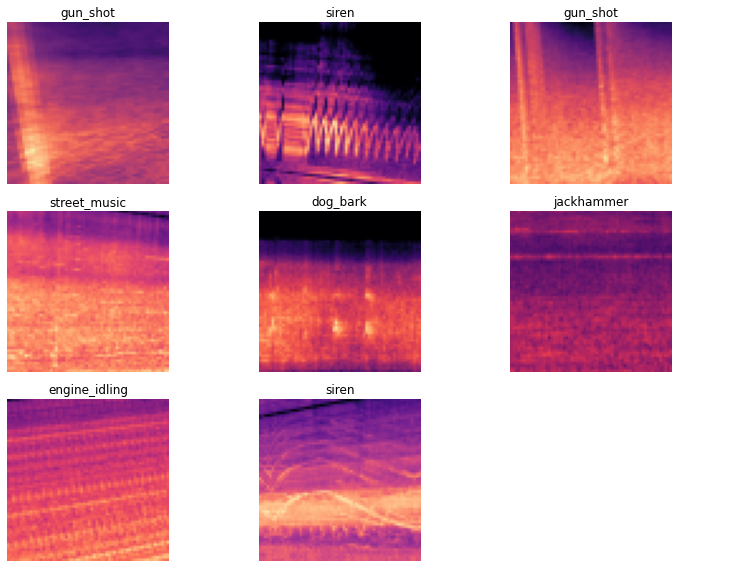

In [84]:
data.show_batch(6,figsize=(11,8))

In [85]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy])

In [86]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


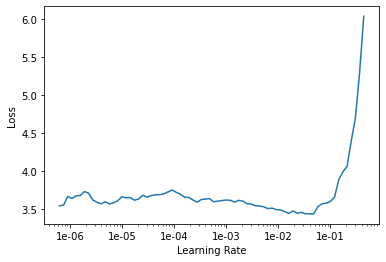

In [87]:
learn.recorder.plot()

In [88]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.175246,1.530394,0.515033,01:00
1,1.761235,1.428339,0.512418,00:59
2,1.567437,1.234430,0.590850,00:57
3,1.376348,1.030424,0.652288,00:55
4,1.300011,0.932498,0.680392,00:55
5,1.160491,0.822080,0.722876,00:54
6,1.109882,0.766759,0.741830,00:54
7,0.919691,0.709300,0.777778,00:54
8,0.972156,0.693500,0.773856,00:53
9,1.018147,0.704741,0.775817,00:53


In [89]:
learn.fit_one_cycle(10,max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.039544,0.690765,0.766667,00:59
1,1.259328,0.780145,0.748366,00:57
2,1.181336,0.661152,0.767974,00:57
3,1.130050,0.966770,0.692810,00:58
4,1.042219,0.588598,0.807190,00:56
5,1.014163,1.027897,0.818954,00:55
6,0.793256,1.199545,0.841830,00:54
7,0.688421,0.534570,0.867974,00:53
8,0.698586,0.976965,0.866013,00:53
9,0.719540,0.406501,0.875817,00:55


In [90]:
learn.save('stage-1')

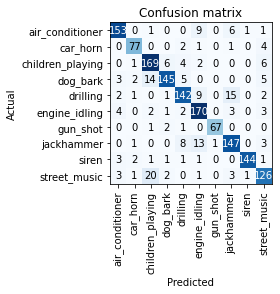

In [91]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [92]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.824229,1.076207,0.848366,01:03


In [94]:
learn.unfreeze()
learn.fit_one_cycle(1,1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.627408,0.379338,0.909150,01:02


In [95]:
learn.unfreeze()
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.166275,0.850929,0.733333,01:06


In [96]:
learn.unfreeze()
learn.fit_one_cycle(1,1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.026162,0.890308,0.775817,01:04


In [97]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.013260,0.863885,0.796078,01:04


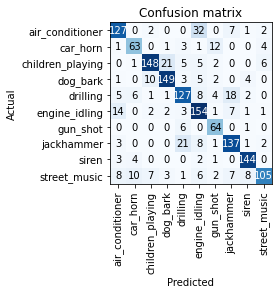

In [98]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [99]:
learn.fit_one_cycle(5,1e-4,1e-3/5)

epoch,train_loss,valid_loss,accuracy,time
0,0.986110,0.781319,0.807190,01:04
1,0.833610,0.489456,0.859477,01:03
2,0.650980,0.626660,0.875817,01:02
3,0.666928,1.060836,0.903268,01:00
4,0.577588,0.588724,0.902614,00:59


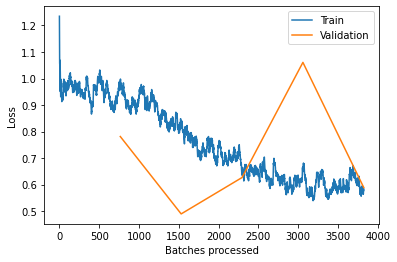

In [100]:
learn.recorder.plot_losses()

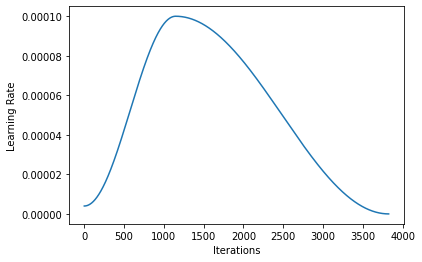

In [101]:
learn.recorder.plot_lr()

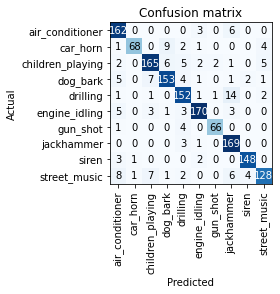

In [102]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [103]:
learn.fit_one_cycle(5,1e-4,1e-4/5)

epoch,train_loss,valid_loss,accuracy,time
0,0.548854,0.355966,0.890850,01:00
1,0.620410,0.349271,0.913072,00:58
2,0.534065,0.318072,0.909804,00:58
3,0.458887,0.264780,0.924837,00:59
4,0.459538,0.247675,0.928758,00:58


In [104]:
learn.save('stage-2')

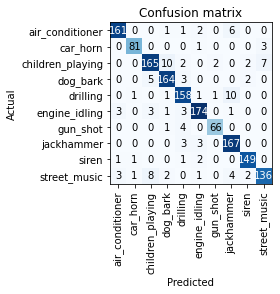

In [105]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [107]:
learn.fit_one_cycle(1,slice(5e-4/(2.6 **4),1e-4/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.360297,0.235332,0.934641,00:59


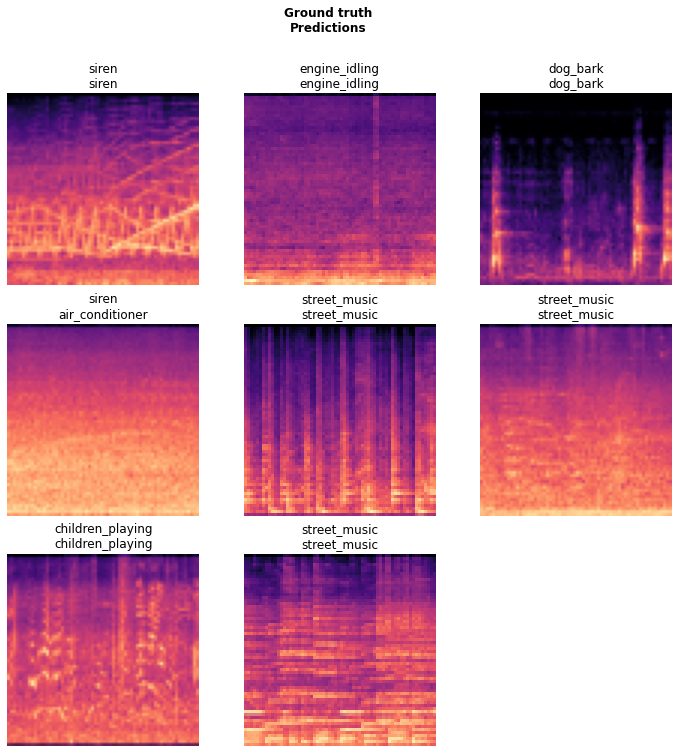

In [108]:
learn.show_results()

## Predict on unseen data

In [128]:
train_df.head()

,Image,class
0,100032-3-0-0.png,dog_bark
1,100263-2-0-117.png,children_playing
2,100263-2-0-121.png,children_playing
3,100263-2-0-126.png,children_playing
4,100263-2-0-137.png,children_playing


In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(sample_df,test_size=0.10,random_state=42)

In [133]:
import shutil
src ='/content/drive/My Drive/AV_Hack/Sound/Spectrogram/'
dest = '/content/drive/My Drive/AV_Hack/Sound/test/'
for i in X_test['Image'].values.tolist():
  img = src+i
  shutil.copy(img,dest)


In [127]:
data

ImageDataBunch;

Train: LabelList (6124 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
dog_bark,children_playing,children_playing,children_playing,children_playing
Path: /content/drive/My Drive/AV_Hack/Sound/Spectrogram;

Valid: LabelList (1530 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
siren,engine_idling,dog_bark,siren,street_music
Path: /content/drive/My Drive/AV_Hack/Sound/Spectrogram;

Test: None

## Add test folder

After training the model, in order to get the test predictions I used the following code

In [134]:
test_data = ImageList.from_df(X_test, '/content/drive/My Drive/AV_Hack/Sound/test')
data.add_test(test_data)

In [147]:
test_predictions = []
for test_image in test_data:
    test_predictions.append(data.classes[learn.predict(test_image)[1]])

Sample predictions made of first test spectogram

In [137]:
pred_class,pred_idx,outputs = learn.predict(data.test_ds[0][0])

In [148]:
pred_class,pred_idx,outputs 

(Category tensor(9),
 tensor(9),
 tensor([1.7286e-03, 2.1696e-04, 1.6861e-03, 4.4558e-04, 4.0958e-05, 2.2941e-04,
         4.0688e-05, 4.0342e-05, 3.3810e-04, 9.9523e-01]))

In [138]:
data.classes[pred_idx]

'street_music'

In [151]:
X_test['Predicted_class'] = test_predictions

In [152]:
X_test.head()

,Image,Label,Predicted_class
7251,66324-9-0-19.png,street_music,street_music
4080,178686-0-0-23.png,air_conditioner,air_conditioner
4985,195451-5-0-3.png,engine_idling,engine_idling
828,116423-2-0-4.png,children_playing,children_playing
2166,153261-0-0-1.png,air_conditioner,air_conditioner


# Visualize Predictions made by the resnet34 Model

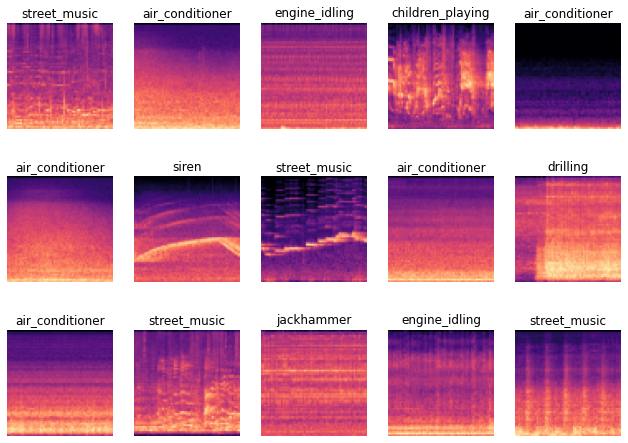

In [168]:
_,axs = plt.subplots(3,5,figsize=(11,8))
for i,ax in enumerate(axs.flatten()): 
  img = data.test_ds[i][0]
  img.show(ax=ax,y=learn.predict(img)[0])

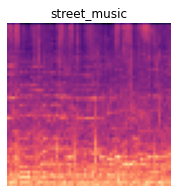

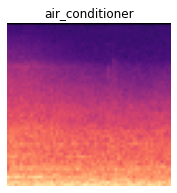

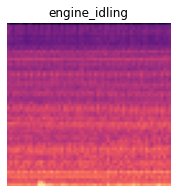

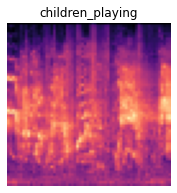

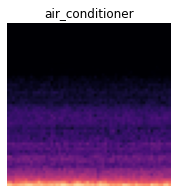

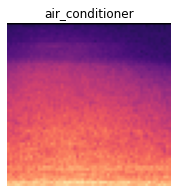

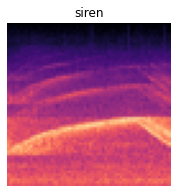

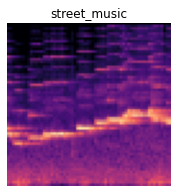

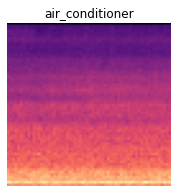

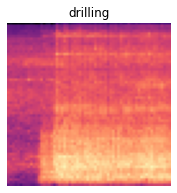

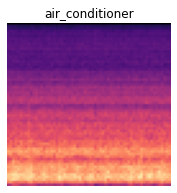

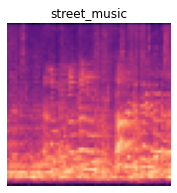

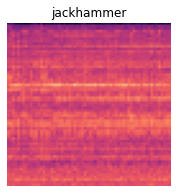

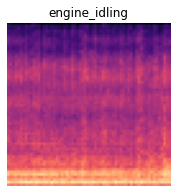

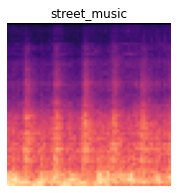

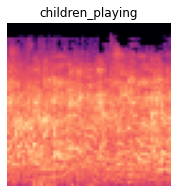

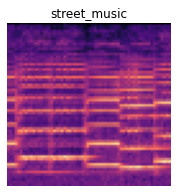

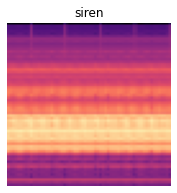

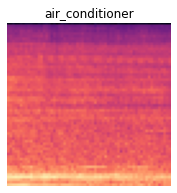

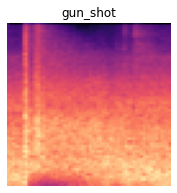

In [157]:
for i in range(20):
  img = data.test_ds[i][0]
  img.show(y=learn.predict(img)[0])

# Visualizations

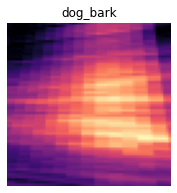

In [125]:
img = data.train_ds[0][0]
img.show(y=learn.predict(img)[0])

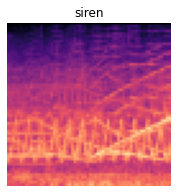

In [121]:
img = data.valid_ds[0][0]
img.show(y=learn.predict(img)[0])

In [ ]:
data.test_ds

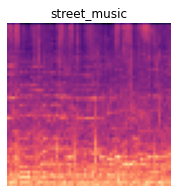

In [149]:
img = data.test_ds[0][0]
img.show(y=learn.predict(img)[0])